# Google Stock Price Prediction Using RNN - LSTM

#### Dataset Link : https://finance.yahoo.com/quote/GOOG/history

____

## 1. Data processing

### 1.1 Import data

In [1]:
# importing required libraries
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
data=pd.read_csv('GOOG.csv',date_parser=True)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994 entries, 0 to 3993
Data columns (total 7 columns):
Date         3994 non-null object
Open         3994 non-null float64
High         3994 non-null float64
Low          3994 non-null float64
Close        3994 non-null float64
Adj Close    3994 non-null float64
Volume       3994 non-null int64
dtypes: float64(5), int64(1), object(1)
memory usage: 218.5+ KB


In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,19-08-2004,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,20-08-2004,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
2,23-08-2004,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,24-08-2004,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,25-08-2004,52.284027,53.798351,51.746044,52.802086,52.802086,9232100


In [5]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3989,24-06-2020,1461.510010,1475.420044,1429.750000,1431.969971,1431.969971,1756000
3990,25-06-2020,1429.900024,1442.900024,1420.000000,1441.329956,1441.329956,1230500
3991,26-06-2020,1431.390015,1433.449951,1351.989990,1359.900024,1359.900024,4267700
3992,29-06-2020,1358.180054,1395.599976,1347.010010,1394.969971,1394.969971,1810200
3993,30-06-2020,1390.439941,1418.650024,1383.959961,1413.609985,1413.609985,2041600


In [6]:
data_training=data[data['Date']<'2019-01-01'].copy()
data_training

,Date,Open,High,Low,Close,Adj Close,Volume
0,19-08-2004,49.813286,51.835709,47.800831,49.982655,49.982655,44871300
1,20-08-2004,50.316402,54.336334,50.062355,53.952770,53.952770,22942800
9,01-09-2004,51.158245,51.292744,49.648903,49.937820,49.937820,9181600
10,02-09-2004,49.409801,50.993862,49.285267,50.565468,50.565468,15190400
11,03-09-2004,50.286514,50.680038,49.474556,49.818268,49.818268,5176800
...,...,...,...,...,...,...,...
3982,15-06-2020,1390.800049,1424.800049,1387.920044,1419.849976,1419.849976,1503900
3983,16-06-2020,1445.219971,1455.020020,1425.900024,1442.719971,1442.719971,1709200
3984,17-06-2020,1447.160034,1460.000000,1431.380005,1451.119995,1451.119995,1548300
3985,18-06-2020,1449.160034,1451.410034,1427.010010,1435.959961,1435.959961,1581900


In [7]:
data_test=data[data['Date']>='2019-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
2,23-08-2004,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,24-08-2004,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,25-08-2004,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
5,26-08-2004,52.279045,53.773445,52.134586,53.753517,53.753517,7128600
6,27-08-2004,53.848164,54.107193,52.647663,52.876804,52.876804,6241200
...,...,...,...,...,...,...,...
3989,24-06-2020,1461.510010,1475.420044,1429.750000,1431.969971,1431.969971,1756000
3990,25-06-2020,1429.900024,1442.900024,1420.000000,1441.329956,1441.329956,1230500
3991,26-06-2020,1431.390015,1433.449951,1351.989990,1359.900024,1359.900024,4267700
3992,29-06-2020,1358.180054,1395.599976,1347.010010,1394.969971,1394.969971,1810200


In [8]:
data_training=data_training.drop(['Date','Adj Close'],axis=1)
data_training.head()

,Open,High,Low,Close,Volume
0,49.813286,51.835709,47.800831,49.982655,44871300
1,50.316402,54.336334,50.062355,53.952770,22942800
9,51.158245,51.292744,49.648903,49.937820,9181600
10,49.409801,50.993862,49.285267,50.565468,15190400
11,50.286514,50.680038,49.474556,49.818268,5176800


### 1.2 Feature scaling

In [9]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)

In [10]:
data_training

array([[2.73426779e-04, 7.80107183e-04, 0.00000000e+00, 1.11307572e-04,
        5.43577404e-01],
       [6.14369781e-04, 2.46809237e-03, 1.53469411e-03, 2.79949983e-03,
        2.77885613e-01],
       [1.18485547e-03, 4.13592062e-04, 1.25412121e-03, 8.09494841e-05,
        1.11151095e-01],
       ...,
       [9.47203350e-01, 9.51326654e-01, 9.38911463e-01, 9.48831068e-01,
        1.86639138e-02],
       [9.48558676e-01, 9.45528209e-01, 9.35945938e-01, 9.38566105e-01,
        1.90710208e-02],
       [9.45061913e-01, 9.43091378e-01, 9.32104979e-01, 9.35695178e-01,
        3.81662741e-02]])

### 1.3 Data structure creation

Important step to create a sliding window! A special data structure is needed to cover 60-time stamps, based on which RNN will predict the 61st price. Here the number of past timestamps is set to 60 based on experimentation. Thus, X_train is a nested list, which contains lists of 60 time-stamp prices. y_train is a list of stock prices which is the next day stock price, corresponding to each list in X_train. Specifically,

In [11]:
X_train = []
y_train = []

data_training.shape[0]

2632

In [12]:
for i in range(60, data_training.shape[0]):

    X_train.append(data_training[i-60: i])
    y_train.append(data_training[i, 0])


In [13]:
 X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_train.shape, y_train.shape

((2572, 60, 5), (2572,))

## 1.4 Data reshaping

In [15]:
#X_train = np.reshape(X_train, newshape = (X_train.shape[0], X_train.shape[1], 1))

## 2. Model building
### RNN model (Deep-Learning)

In [16]:
#import Tensorflow library

from tensorflow.keras import Sequential

from tensorflow.keras.layers import Dense,LSTM,Dropout


In [17]:
# initialize the model

regressor = Sequential()

#add the 1st LSTM layer with the Dropout layer 
regressor.add(LSTM(units = 50,activation='relu',return_sequences = True, input_shape = (X_train.shape[1], 5)))
regressor.add(Dropout(rate = 0.2))

##add 2nd lstm layer
regressor.add(LSTM(units = 60,activation='relu', return_sequences = True))
regressor.add(Dropout(rate = 0.3))

##add 3rd lstm layer
regressor.add(LSTM(units = 80,activation='relu', return_sequences = True))
regressor.add(Dropout(rate = 0.4))

##add 4th lstm layer
regressor.add(LSTM(units = 120, return_sequences = False))
regressor.add(Dropout(rate = 0.5))

#output layer. The output dimension is 1 since we are predicting 1 price each time.
regressor.add(Dense(units = 1))


In [18]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 60, 50)            11200     
_________________________________________________________________
dropout (Dropout)            (None, 60, 50)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 60, 60)            26640     
_________________________________________________________________
dropout_1 (Dropout)          (None, 60, 60)            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 60, 80)            45120     
_________________________________________________________________
dropout_2 (Dropout)          (None, 60, 80)            0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 120)               9

## 3. Model compiling

In [19]:
regressor.compile(optimizer ='adam', loss = 'mean_squared_error')

## 4. Model fitting

In [20]:
regressor.fit(x = X_train, y = y_train, batch_size = 32, epochs = 100)

Epoch 1/100
81/81 [==============================] - 14s 169ms/step - loss: 0.0129
Epoch 2/100
81/81 [==============================] - 13s 160ms/step - loss: 0.0039
Epoch 3/100
81/81 [==============================] - 13s 162ms/step - loss: 0.0038
Epoch 4/100
81/81 [==============================] - 14s 168ms/step - loss: 0.0035
Epoch 5/100
81/81 [==============================] - 14s 171ms/step - loss: 0.0037
Epoch 6/100
81/81 [==============================] - 14s 168ms/step - loss: 0.0028
Epoch 7/100
81/81 [==============================] - 14s 167ms/step - loss: 0.0027
Epoch 8/100
81/81 [==============================] - 14s 175ms/step - loss: 0.0028
Epoch 9/100
81/81 [==============================] - 13s 166ms/step - loss: 0.0026
Epoch 10/100
81/81 [==============================] - 14s 168ms/step - loss: 0.0024
Epoch 11/100
81/81 [==============================] - 15s 186ms/step - loss: 0.0025
Epoch 12/100
81/81 [==============================] - 13s 165ms/step - loss: 0.0023
E

81/81 [==============================] - 17s 212ms/step - loss: 9.3434e-04
Epoch 99/100
81/81 [==============================] - 17s 209ms/step - loss: 0.0011
Epoch 100/100
81/81 [==============================] - 17s 212ms/step - loss: 9.2123e-04


## 5. Model prediction
### 5.1 Import test data



In [21]:
data_test=data[data['Date']>='2019-01-01'].copy()
data_training=data[data['Date']<'2019-01-01'].copy()

In [22]:
# Data processing

data_test.head()

,Date,Open,High,Low,Close,Adj Close,Volume
2,23-08-2004,55.168217,56.528118,54.321388,54.495735,54.495735,18342800
3,24-08-2004,55.412300,55.591629,51.591621,52.239193,52.239193,15319700
4,25-08-2004,52.284027,53.798351,51.746044,52.802086,52.802086,9232100
5,26-08-2004,52.279045,53.773445,52.134586,53.753517,53.753517,7128600
6,27-08-2004,53.848164,54.107193,52.647663,52.876804,52.876804,6241200


In [23]:
past_60_days=data_training.tail(60)

we need to concatenate the train and test datasets for prediction, because we use the previous 60 days’ stock prices to predict the next-day price. In another word, we need the 60 days’ price before the 1st date in the test dataset.

In [24]:
df=past_60_days.append(data_test,ignore_index=True)

In [25]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,18-02-2020,1515.000000,1531.630005,1512.589966,1519.670044,1519.670044,1120700
1,19-02-2020,1525.069946,1532.105957,1521.400024,1526.689941,1526.689941,949300
2,20-02-2020,1522.000000,1529.640015,1506.819946,1518.150024,1518.150024,1096600
3,02-03-2020,1351.609985,1390.869995,1326.814941,1389.109985,1389.109985,2431500
4,03-03-2020,1399.420044,1410.150024,1332.000000,1341.390015,1341.390015,2402300


In [26]:
df=df.drop(['Date','Adj Close'],axis=1)
df.head()

,Open,High,Low,Close,Volume
0,1515.000000,1531.630005,1512.589966,1519.670044,1120700
1,1525.069946,1532.105957,1521.400024,1526.689941,949300
2,1522.000000,1529.640015,1506.819946,1518.150024,1096600
3,1351.609985,1390.869995,1326.814941,1389.109985,2431500
4,1399.420044,1410.150024,1332.000000,1341.390015,2402300


### 5.2 Data processing

In [27]:
inputs=scaler.transform(df)

In [28]:
#create the test data structure

X_test = []
y_test = []
for i in range(60, inputs.shape[0]): 
    X_test.append(inputs[i-60: i])
    y_test.append(inputs[i, 0])
    

In [29]:
X_test = np.array(X_test)
y_test= np.array(y_test)
X_test.shape,y_test.shape

((1362, 60, 5), (1362,))

### 5.3 Model prediction

In [30]:
predicted_stock_price = regressor.predict(X_test)

In [31]:
predicted_stock_price

array([[0.79835445],
       [0.7737372 ],
       [0.73688304],
       ...,
       [0.8210373 ],
       [0.8126651 ],
       [0.8000818 ]], dtype=float32)

In [32]:
scaler.scale_

array([6.77662810e-04, 6.75025317e-04, 6.78610578e-04, 6.77106900e-04,
       1.21162775e-08])

In [33]:
scale=1/6.77662810e-04
scale

1475.660144312774

In [34]:
#we have predicted is the scaled values, so we need to reverse the prediction.

predicted_stock_price = predicted_stock_price*scale
y_test=y_test*scale
predicted_stock_price

array([[1178.0999],
       [1141.7732],
       [1087.3889],
       ...,
       [1211.572 ],
       [1199.2175],
       [1180.6488]], dtype=float32)

## 6. Result visualization

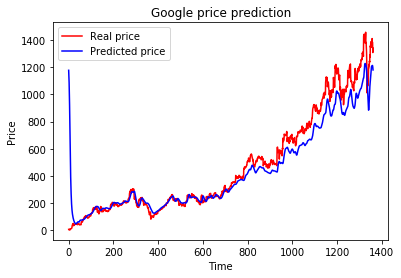

In [35]:
plt.plot(y_test, color = 'red', label = 'Real price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted price')
plt.title('Google price prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()